In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [24]:
df = pd.read_csv ('./dataset/HandInfo.csv')

'male'

In [76]:
files = glob('./dataset/Hands/*.jpg')
list_images = []
img_size = 256

for file in files:
    path_file = file.replace("\\","/");
    filename = path_file.split("/")[3]
    img = cv2.imread(path_file)
    resized_img = cv2.resize(img, (img_size, img_size))[...,::-1]
    list_images.append([resized_img, df[df['imageName'] == filename].filter(items = ['gender']).values[0][0]])
    

In [77]:
random.shuffle(list_images)
data = np.array(list_images)

<ipython-input-77-1f9e297ae4e2>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(list_images)


C:\Users\josevictor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Dataset')

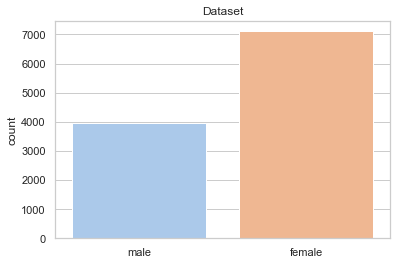

In [90]:
classes = []
m = 0
f = 0
for i in data:
    if(i[1] == 'male'):
        classes.append("male")
        m = m + 1
    else:
        classes.append("female")
        f = f + 1
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(classes).set_title("Dataset")

In [83]:
print("Male {} | Female {}".format(m,f))

Male 3967 | Female 7109


Text(0.5, 1.0, 'male')

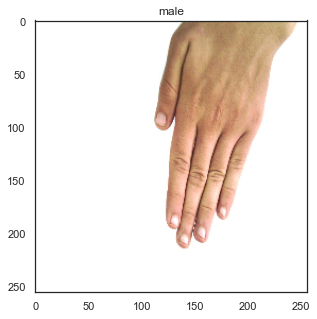

In [80]:
plt.figure(figsize = (5,5))
plt.imshow(data[0][0])
plt.title(data[0][1])

In [84]:
# Female = 7109
# Male   = 3967
# Total  = 11076
# Train  = 8307(F - 5332 | M - 2975)
# Test   = 2769(F - 1777 | M - 992)

11076

C:\Users\josevictor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\josevictor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-115-6bcbf7685b3a>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


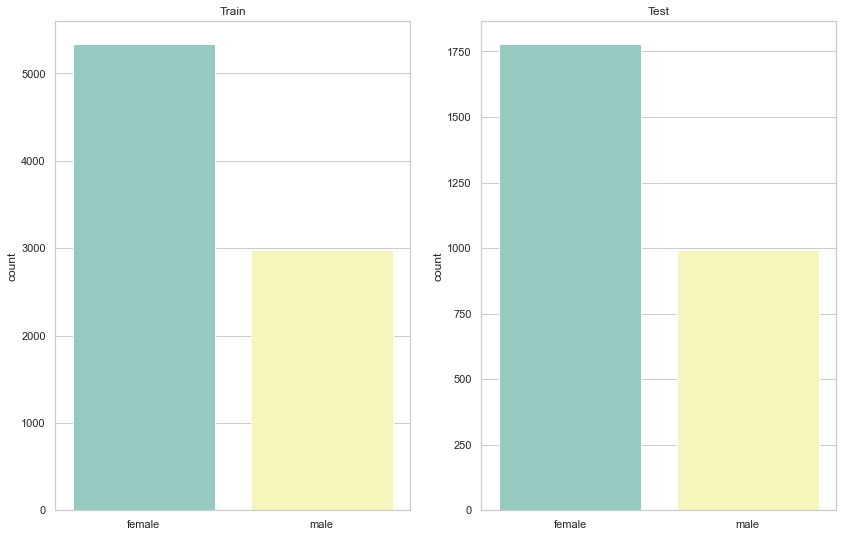

In [115]:
train = []
test = []
index = 0

while(len(train) != 5332):
    if(data[index][1] == 'female'):
        train.append(data[index])
    index = index + 1

while(len(test) != 1777):
    if(data[index][1] == 'female'):
        test.append(data[index])
    index = index + 1
    
index = 0

while(len(train) != 8307):
    if(data[index][1] == 'male'):
        train.append(data[index])
    index = index + 1

while(len(test) != 2769):
    if(data[index][1] == 'male'):
        test.append(data[index])
    index = index + 1

fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(12,9)})
classes = []
for i in train:
    if(i[1] == 'male'):
        classes.append("male")
    else:
        classes.append("female")
sns.set_theme(style="whitegrid", palette="Set3")
sns.countplot(classes, ax=ax[0]).set_title("Train")

classes = []
for i in test:
    if(i[1] == 'male'):
        classes.append("male")
    else:
        classes.append("female")
sns.set_theme(style="whitegrid", palette="Set3")
sns.countplot(classes, ax=ax[1]).set_title("Test")
fig.show()

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

for feature, classe in train:
  X_train.append(feature)
  y_train.append(classe)

for feature, classe in test:
  X_test.append(feature)
  y_test.append(classe)

X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)